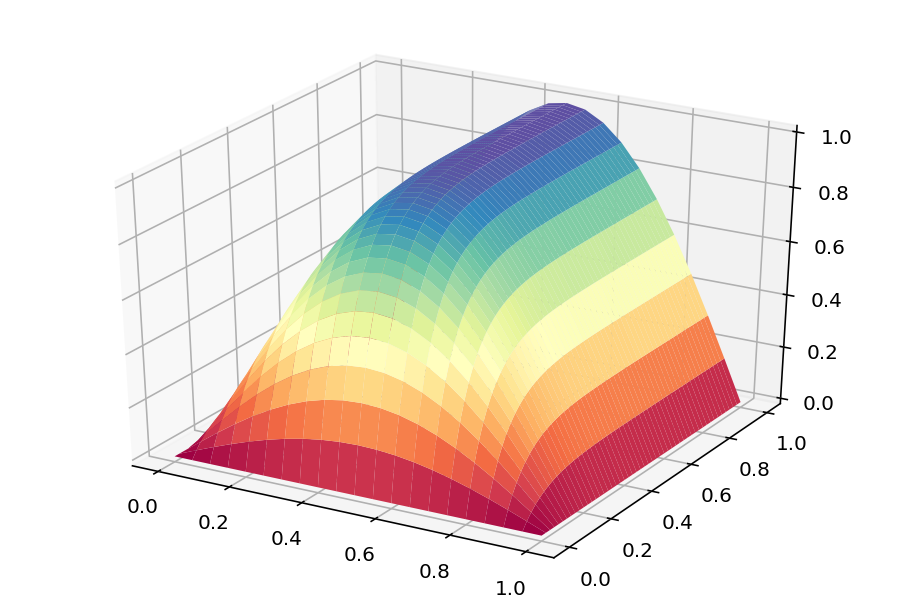

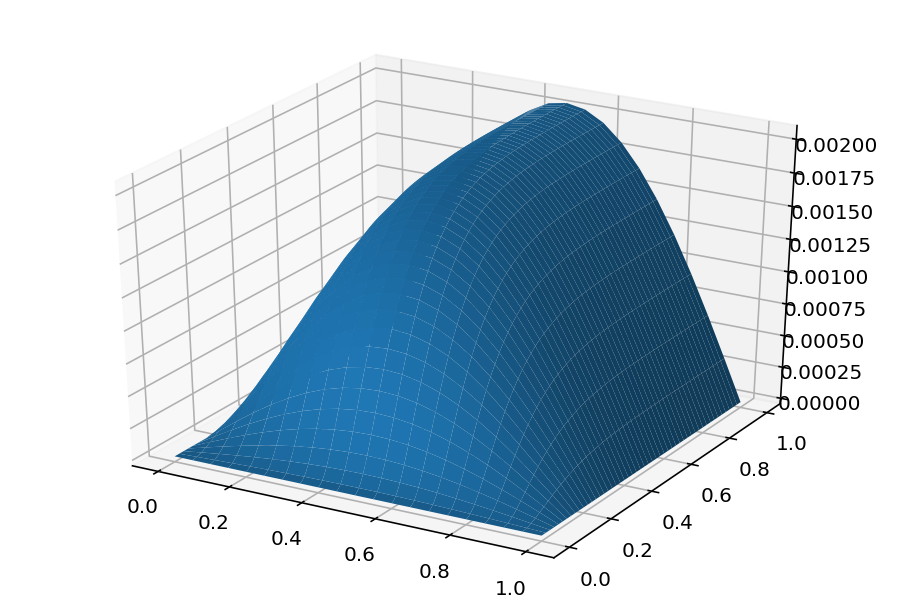

In [58]:
#Рунге-Кутты (4стадийный)
import math as m # подключаем библиотеки...
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
%matplotlib inline
#инициализация
x_min = 0.
x_max = 1.
t_min = 0.
t_max = 1.
t = 0.0001
h = 0.05
N = int((x_max-x_min)/h)+1
T = int((t_max-t_min)/t)
A = np.zeros((N,N))# матрица перехода
for i in range(1,N-1):
    A[i][i]=-2
    A[i][i-1]=1
    A[i][i+1]=1
A=A/h**2
u = np.zeros((T,N))
nevyazka = np.zeros((T,N))
g = np.arange(0,N,1)
f = m.pi**2*np.sin(h*g*m.pi)
for i in range(0,T-1):
    k1=A.dot(u[i])+f
    k2=A.dot(u[i]+t*k1/2)+f
    k3=A.dot(u[i]+t*k2/2)+f
    k4=A.dot(u[i]+t*k3)+f
    u[i+1]=u[i]+t*(k1+2*k2+2*k3+k4)/6
    nevyazka[i+1]=u[i+1]+f*m.expm1(-(i+1)*t*m.pi**2)/m.pi**2
#print(u)
#строим графики
import pylab
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def makeData ():
    X = np.arange (x_min, x_max+h, h)
    Time = np.arange (t_min, t_max, t)
    xgrid, tgrid = np.meshgrid(X, Time)
    #teorgrid = -np.sin(m.pi*xgrid) * m.expm1(-tgrid*m.pi**2)
    return xgrid, tgrid#, teorgrid

x, y = makeData()
fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, u, cmap = cm.Spectral)
pylab.show()
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(x, y, nevyazka, cmap = cm.Spectral)
pylab.show()

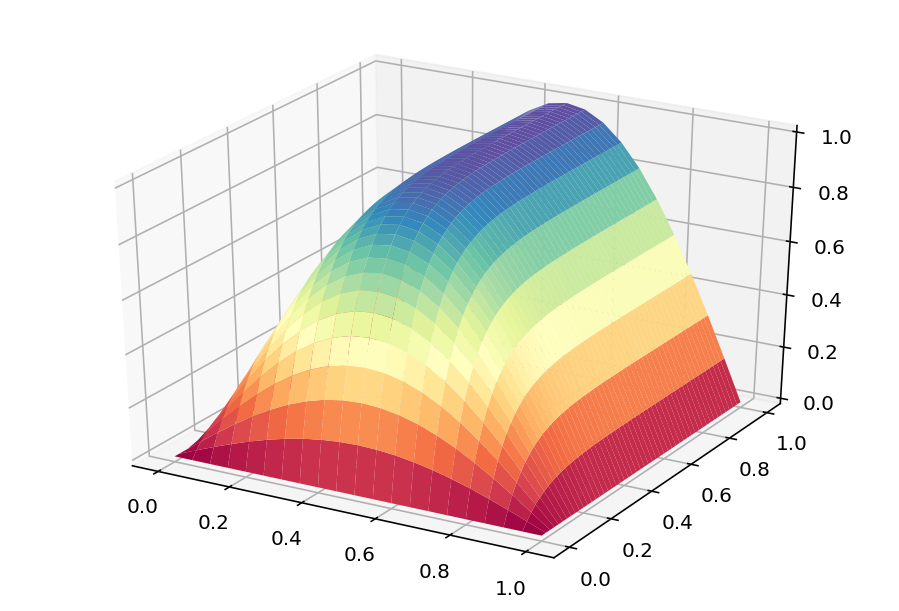

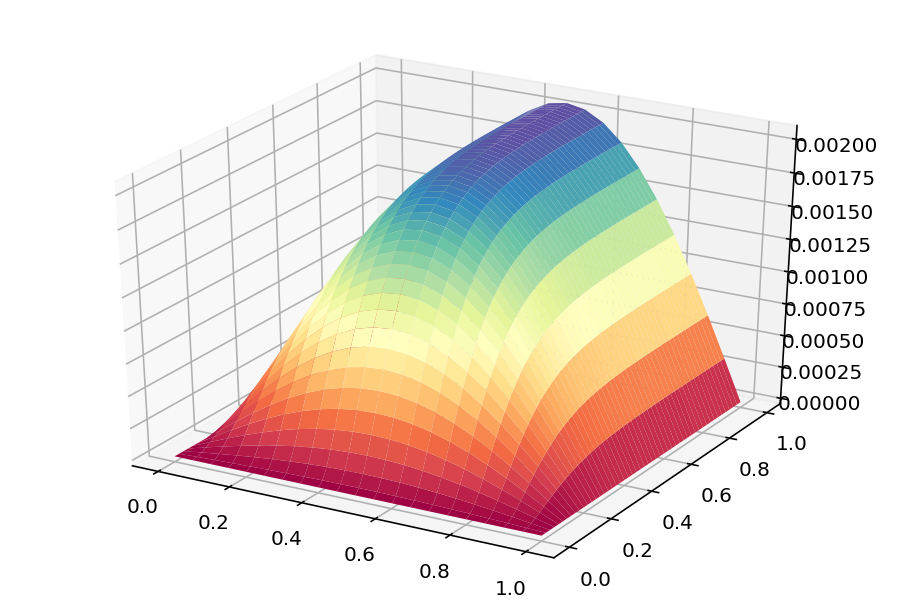

In [61]:
#Эйлер с пересчетом
import math as m # подключаем библиотеки...
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
%matplotlib inline
#инициализация
x_min = 0.
x_max = 1.
t_min = 0.
t_max = 1.
t = 0.0001
h = 0.05
N = int((x_max-x_min)/h)+1
T = int((t_max-t_min)/t)
A = np.zeros((N,N))# матрица перехода
for i in range(1,N-1):
    A[i][i]=-2
    A[i][i-1]=1
    A[i][i+1]=1
A=A/h**2
u = np.zeros((T,N))
nevyazka = np.zeros((T,N))
g = np.arange(0,N,1)
f = m.pi**2*np.sin(h*g*m.pi)
for i in range(0,T-1):
    k1=u[i]+t*(A.dot(u[i])+f)
    u[i+1]=u[i]+t*(A.dot(u[i])+f+A.dot(k1)+f)/2
    nevyazka[i+1]=u[i+1]+f*m.expm1(-(i+1)*t*m.pi**2)/m.pi**2
#print(u)
#строим графики
import pylab
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def makeData ():
    X = np.arange (x_min, x_max+h, h)
    Time = np.arange (t_min, t_max, t)
    xgrid, tgrid = np.meshgrid(X, Time)
    #teorgrid = -np.sin(m.pi*xgrid) * m.expm1(-tgrid*m.pi**2)
    return xgrid, tgrid#, teorgrid

x, y = makeData()
fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, u, cmap = cm.Spectral)
pylab.show()
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(x, y, nevyazka, cmap = cm.Spectral)
pylab.show()